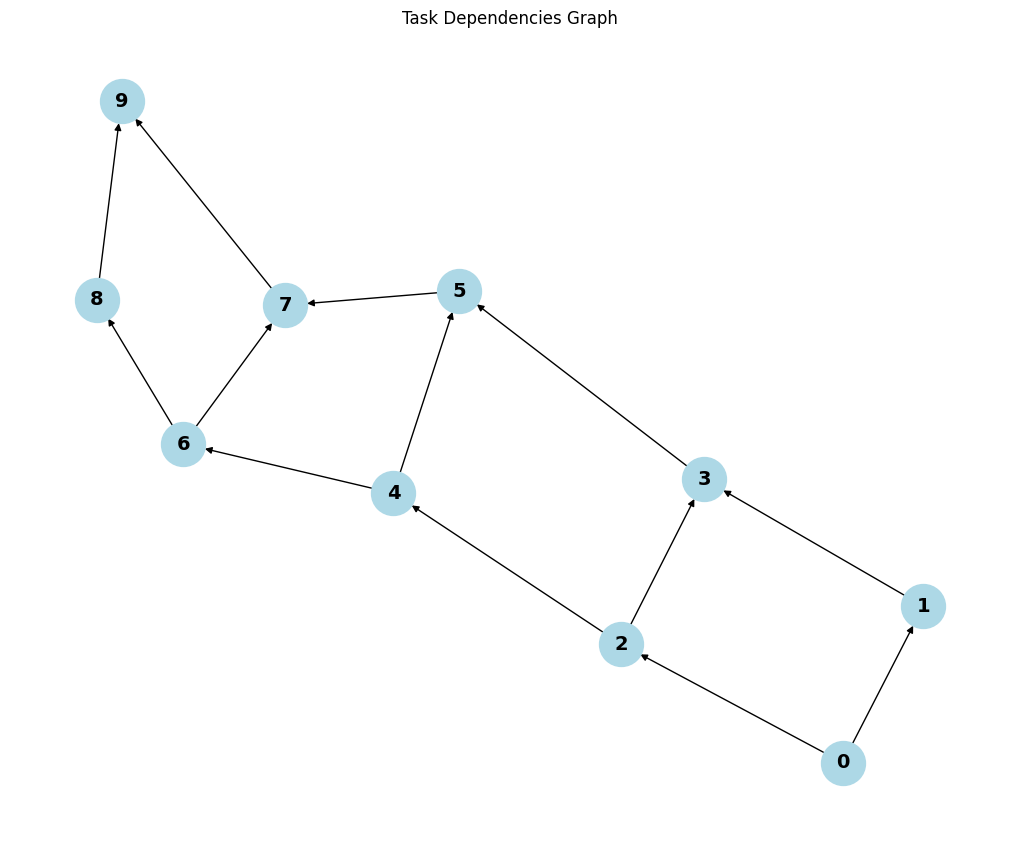

Task 0: Execution times for each process - [16 29 38]
Task 1: Execution times for each process - [24 20 17]
Task 2: Execution times for each process - [38 30 16]
Task 3: Execution times for each process - [35 28 32]
Task 4: Execution times for each process - [20 20 33]
Task 5: Execution times for each process - [30 13 17]
Task 6: Execution times for each process - [33 12 31]
Task 7: Execution times for each process - [30 11 33]
Task 8: Execution times for each process - [21 39 15]
Task 9: Execution times for each process - [11 37 30]
Generation 1: Best Chromosome - [0 1 1 1 1 1 1 1 0 2], Makespan - 129.0
Generation 2: Best Chromosome - [0 1 1 1 1 1 1 1 0 0], Makespan - 110.0
Generation 3: Best Chromosome - [0 1 1 1 1 1 1 1 0 0], Makespan - 110.0
Generation 4: Best Chromosome - [0 2 2 0 1 1 1 1 0 0], Makespan - 103.0
Generation 5: Best Chromosome - [0 2 2 0 1 1 1 1 0 0], Makespan - 103.0
Generation 6: Best Chromosome - [0 2 2 0 1 1 1 1 0 0], Makespan - 103.0
Generation 7: Best Chromosom

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
num_tasks = 10
num_processes = 3
population_size = 20
generations = 20
crossover_rate = 0.7
mutation_rate = 0.1

# Task dependencies (Example: task_dependencies[i] contains tasks that need to be completed before task i)
# Representing a DAG using an adjacency list
task_dependencies = {
    0: [],      # Task 0 has no dependencies
    1: [0],     # Task 1 depends on Task 0
    2: [0],     # Task 2 depends on Task 0
    3: [1, 2],  # Task 3 depends on Tasks 1 and 2
    4: [2],     # Task 4 depends on Task 2
    5: [3, 4],  # Task 5 depends on Tasks 3 and 4
    6: [4],     # Task 6 depends on Task 4
    7: [5, 6],  # Task 7 depends on Tasks 5 and 6
    8: [6],     # Task 8 depends on Task 6
    9: [7, 8]   # Task 9 depends on Tasks 7 and 8
}

# Create a directed graph
G = nx.DiGraph()

# Add edges based on dependencies
for task, dependencies in task_dependencies.items():
    for dep in dependencies:
        G.add_edge(dep, task)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=14, font_weight="bold", arrows=True)
plt.title("Task Dependencies Graph")
plt.show()

# Simulated execution time ranges for each process (rows: tasks, cols: processes) ranging 10-40
np.random.seed(42)
execution_times = np.random.randint(10, 40, size=(num_tasks, num_processes))

# Print the execution time for each task
for task in range(num_tasks):
    print(f"Task {task}: Execution times for each process - {execution_times[task]}")

# Initialize population with random assignments of tasks to processes
def initialize_population():
    return [np.random.randint(0, num_processes, size=num_tasks) for _ in range(population_size)]

# Calculate the fitness of a chromosome (makespan)
# Adjusted calculate_makespan function to handle tasks without dependencies
def calculate_makespan(chromosome):
    task_start_times = np.zeros(num_tasks)  # Start times for each task
    task_end_times = np.zeros(num_tasks)    # End times for each task
    
    # Calculate start and end times while respecting dependencies
    for task in range(num_tasks):
        process = chromosome[task]
        
        # Calculate start time based on dependencies
        if task in task_dependencies and task_dependencies[task]:
            start_time = max(task_end_times[dep] for dep in task_dependencies[task])
        else:
            start_time = 0  # If no dependencies, start at time 0

        # Set start and end times for the current task
        task_start_times[task] = start_time
        task_end_times[task] = start_time + execution_times[task][process]
        
    return task_end_times.max()  # Makespan is the maximum end time

# Selection via tournament selection
def tournament_selection(population, fitness_scores, k=3):
    selected = []
    for _ in range(population_size):
        candidates = random.sample(list(zip(population, fitness_scores)), k)
        selected.append(min(candidates, key=lambda x: x[1])[0])
    return selected

# Crossover operation (one-point crossover)
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, num_tasks - 1)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    return parent1, parent2

# Mutation operation
def mutate(chromosome):
    if random.random() < mutation_rate:
        task = random.randint(0, num_tasks - 1)
        chromosome[task] = random.randint(0, num_processes - 1)
    return chromosome

# Genetic algorithm
def genetic_algorithm():
    # Initialize population
    population = initialize_population()
    best_makespan = float('inf')
    best_solution = None
    previous_fitness_scores = None

    for generation in range(generations):
        # Calculate fitness for each chromosome
        fitness_scores = [calculate_makespan(chrom) for chrom in population]
        
        # Track the best solution
        min_makespan = min(fitness_scores)
        if min_makespan < best_makespan:
            best_makespan = min_makespan
            best_solution = population[fitness_scores.index(min_makespan)]
        
        # Print the chromosome for the current generation
        print(f"Generation {generation+1}: Best Chromosome - {best_solution}, Makespan - {best_makespan}")
        
        # Check for termination condition
        if previous_fitness_scores is not None and fitness_scores == previous_fitness_scores:
            print("Terminating due to no improvement in generations.")
            break
        
        # Update previous fitness scores
        previous_fitness_scores = fitness_scores
        
        # Selection
        selected_population = tournament_selection(population, fitness_scores)
        
        # Generate new population through crossover and mutation
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        
        population = new_population

    return best_solution, best_makespan

# Run the genetic algorithm
best_solution, best_makespan = genetic_algorithm()
print("Best solution:", best_solution)
print("Best makespan:", best_makespan)